In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
df= pd.read_csv('../data/wine.csv', header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
df = df.sample(frac=1)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3918,6.6,0.40,0.32,1.70,0.035,39.0,84.0,0.99096,3.59,0.48,12.7,7,0
4149,6.2,0.33,0.14,4.80,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5,0
3575,6.8,0.28,0.37,7.00,0.057,35.0,208.0,0.99730,3.57,0.55,10.2,5,0
6224,8.3,0.49,0.23,6.65,0.034,6.0,158.0,0.99344,3.05,0.48,11.2,5,0
5,7.4,0.66,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1


In [9]:
dataset = df.values
X = dataset[:, :12].astype(np.float64) 
Y = dataset[:, 12]
print(X.shape, Y.shape)

(6497, 12) (6497,)


In [3]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(4547, 12) (4547,) (1950, 12) (1950,)


In [17]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, epochs=200, batch_size=200)

Epoch 1/200
23/23 [==============================] - 0s 907us/step - loss: 0.4456 - accuracy: 0.8225
Epoch 2/200
23/23 [==============================] - 0s 997us/step - loss: 0.2647 - accuracy: 0.9160
Epoch 3/200
23/23 [==============================] - 0s 997us/step - loss: 0.2305 - accuracy: 0.9239
Epoch 4/200
23/23 [==============================] - 0s 952us/step - loss: 0.2097 - accuracy: 0.9283
Epoch 5/200
23/23 [==============================] - 0s 907us/step - loss: 0.2018 - accuracy: 0.9290
Epoch 6/200
23/23 [==============================] - 0s 907us/step - loss: 0.1979 - accuracy: 0.9303
Epoch 7/200
23/23 [==============================] - 0s 771us/step - loss: 0.1948 - accuracy: 0.9309
Epoch 8/200
23/23 [==============================] - 0s 907us/step - loss: 0.1933 - accuracy: 0.9292
Epoch 9/200
23/23 [==============================] - 0s 771us/step - loss: 0.1923 - accuracy: 0.9318
Epoch 10/200
23/23 [==============================] - 0s 771us/step - loss: 0.1901 - accura

23/23 [==============================] - 0s 771us/step - loss: 0.0416 - accuracy: 0.9868
Epoch 161/200
23/23 [==============================] - 0s 861us/step - loss: 0.0401 - accuracy: 0.9886
Epoch 162/200
23/23 [==============================] - 0s 816us/step - loss: 0.0427 - accuracy: 0.9866
Epoch 163/200
23/23 [==============================] - 0s 771us/step - loss: 0.0386 - accuracy: 0.9890
Epoch 164/200
23/23 [==============================] - 0s 861us/step - loss: 0.0386 - accuracy: 0.9890
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9903
Epoch 166/200
23/23 [==============================] - 0s 907us/step - loss: 0.0420 - accuracy: 0.9872
Epoch 167/200
23/23 [==============================] - 0s 997us/step - loss: 0.0418 - accuracy: 0.9886
Epoch 168/200
23/23 [==============================] - 0s 997us/step - loss: 0.0398 - accuracy: 0.9899
Epoch 169/200
23/23 [==============================] - 0s 998us/step - loss: 0.0411 - acc

In [21]:
result = model.evaluate(X_test, Y_test, verbose=0)
print('test loss: {:.4f}, test_accuracy: {:.4f}'.format(result[0], result[1]))

test loss: 0.0593, test_accuracy: 0.9867


In [4]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [5]:
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

In [32]:
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1)

In [41]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpoint])

Epoch 1/200
 1/19 [>.............................] - ETA: 4s - loss: 2.2855 - accuracy: 0.7300
Epoch 00001: saving model to ./model\01-0.6313.hdf5
19/19 [==============================] - 0s 7ms/step - loss: 1.1536 - accuracy: 0.7031 - val_loss: 0.6313 - val_accuracy: 0.7593
Epoch 2/200
 1/19 [>.............................] - ETA: 0s - loss: 0.5941 - accuracy: 0.7900
Epoch 00002: saving model to ./model\02-0.3491.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.8119 - val_loss: 0.3491 - val_accuracy: 0.8637
Epoch 3/200
 1/19 [>.............................] - ETA: 0s - loss: 0.3817 - accuracy: 0.8600
Epoch 00003: saving model to ./model\03-0.2625.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8930 - val_loss: 0.2625 - val_accuracy: 0.9077
Epoch 4/200
 1/19 [>.............................] - ETA: 0s - loss: 0.3039 - accuracy: 0.9200
Epoch 00004: saving model to ./model\04-0.2392.hdf5
19/19 [==================

Epoch 31/200
 1/19 [>.............................] - ETA: 0s - loss: 0.1157 - accuracy: 0.9550
Epoch 00031: saving model to ./model\31-0.1389.hdf5
19/19 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9555 - val_loss: 0.1389 - val_accuracy: 0.9473
Epoch 32/200
 1/19 [>.............................] - ETA: 0s - loss: 0.1278 - accuracy: 0.9600
Epoch 00032: saving model to ./model\32-0.1378.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9560 - val_loss: 0.1378 - val_accuracy: 0.9484
Epoch 33/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0845 - accuracy: 0.9750
Epoch 00033: saving model to ./model\33-0.1360.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9571 - val_loss: 0.1360 - val_accuracy: 0.9462
Epoch 34/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0810 - accuracy: 0.9800
Epoch 00034: saving model to ./model\34-0.1375.hdf5
19/19 [==============

Epoch 61/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0483 - accuracy: 0.9950
Epoch 00061: saving model to ./model\61-0.0984.hdf5
19/19 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9783 - val_loss: 0.0984 - val_accuracy: 0.9692
Epoch 62/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0718 - accuracy: 0.9700
Epoch 00062: saving model to ./model\62-0.1112.hdf5
19/19 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9794 - val_loss: 0.1112 - val_accuracy: 0.9659
Epoch 63/200
 1/19 [>.............................] - ETA: 0s - loss: 0.1572 - accuracy: 0.9500
Epoch 00063: saving model to ./model\63-0.1020.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.1020 - val_accuracy: 0.9692
Epoch 64/200
 1/19 [>.............................] - ETA: 0s - loss: 0.1077 - accuracy: 0.9750
Epoch 00064: saving model to ./model\64-0.1002.hdf5
19/19 [==============

Epoch 91/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0886 - accuracy: 0.9550
Epoch 00091: saving model to ./model\91-0.0818.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9827 - val_loss: 0.0818 - val_accuracy: 0.9758
Epoch 92/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0690 - accuracy: 0.9750
Epoch 00092: saving model to ./model\92-0.0811.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9835 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 93/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0706 - accuracy: 0.9850
Epoch 00093: saving model to ./model\93-0.1002.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9835 - val_loss: 0.1002 - val_accuracy: 0.9714
Epoch 94/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.9650
Epoch 00094: saving model to ./model\94-0.0938.hdf5
19/19 [==============

Epoch 150/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0170 - accuracy: 0.9950
Epoch 00150: saving model to ./model\150-0.0744.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9865 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 151/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0570 - accuracy: 0.9750
Epoch 00151: saving model to ./model\151-0.0652.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0652 - val_accuracy: 0.9835
Epoch 152/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0501 - accuracy: 0.9900
Epoch 00152: saving model to ./model\152-0.0656.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.0656 - val_accuracy: 0.9835
Epoch 153/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0658 - accuracy: 0.9850
Epoch 00153: saving model to ./model\153-0.0711.hdf5
19/19 [======

In [40]:
result = model.evaluate(X_test, Y_test, verbose=0)
print('test loss: {:.4f}, test_accuracy: {:.4f}'.format(result[0], result[1]))

test loss: 0.0691, test_accuracy: 0.9800


In [43]:
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 더 나은 val_loss 값만 저장

In [44]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpoint])

Epoch 1/200
 1/19 [>.............................] - ETA: 4s - loss: 4.9881 - accuracy: 0.2700
Epoch 00001: val_loss improved from inf to 0.37833, saving model to ./model\01-0.3783.hdf5
19/19 [==============================] - 0s 7ms/step - loss: 1.4429 - accuracy: 0.5766 - val_loss: 0.3783 - val_accuracy: 0.7637
Epoch 2/200
 1/19 [>.............................] - ETA: 0s - loss: 0.3754 - accuracy: 0.7650
Epoch 00002: val_loss improved from 0.37833 to 0.36275, saving model to ./model\02-0.3628.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.7762 - val_loss: 0.3628 - val_accuracy: 0.8143
Epoch 3/200
 1/19 [>.............................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8000
Epoch 00003: val_loss improved from 0.36275 to 0.24567, saving model to ./model\03-0.2457.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8738 - val_loss: 0.2457 - val_accuracy: 0.9286
Epoch 4/200
 1/19 [>...........................

 1/19 [>.............................] - ETA: 0s - loss: 0.0881 - accuracy: 0.9600
Epoch 00054: val_loss improved from 0.11723 to 0.11454, saving model to ./model\54-0.1145.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9692 - val_loss: 0.1145 - val_accuracy: 0.9637
Epoch 55/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0699 - accuracy: 0.9750
Epoch 00055: val_loss improved from 0.11454 to 0.11369, saving model to ./model\55-0.1137.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9709 - val_loss: 0.1137 - val_accuracy: 0.9626
Epoch 56/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0919 - accuracy: 0.9650
Epoch 00056: val_loss did not improve from 0.11369
19/19 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9711 - val_loss: 0.1147 - val_accuracy: 0.9615
Epoch 57/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0832 - accuracy: 0.9700
E

 1/19 [>.............................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9850
Epoch 00110: val_loss did not improve from 0.08098
19/19 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9731 - val_loss: 0.0833 - val_accuracy: 0.9747
Epoch 111/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0610 - accuracy: 0.9850
Epoch 00111: val_loss improved from 0.08098 to 0.07909, saving model to ./model\111-0.0791.hdf5
19/19 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9742 - val_loss: 0.0791 - val_accuracy: 0.9714
Epoch 112/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0505 - accuracy: 0.9800
Epoch 00112: val_loss did not improve from 0.07909
19/19 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.0901 - val_accuracy: 0.9747
Epoch 113/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0760 - accuracy: 0.9800
Epoch 00113: val_loss did not improve fro

Epoch 167/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9850
Epoch 00167: val_loss did not improve from 0.06818
19/19 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.0728 - val_accuracy: 0.9780
Epoch 168/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0711 - accuracy: 0.9750
Epoch 00168: val_loss did not improve from 0.06818
19/19 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9824 - val_loss: 0.0720 - val_accuracy: 0.9780
Epoch 169/200
 1/19 [>.............................] - ETA: 0s - loss: 0.1159 - accuracy: 0.9750
Epoch 00169: val_loss did not improve from 0.06818
19/19 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0803 - val_accuracy: 0.9780
Epoch 170/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0425 - accuracy: 0.9800
Epoch 00170: val_loss did not improve from 0.06818
19/19 [==============

Epoch 196/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0399 - accuracy: 0.9850
Epoch 00196: val_loss did not improve from 0.06340
19/19 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0664 - val_accuracy: 0.9791
Epoch 197/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0318 - accuracy: 0.9900
Epoch 00197: val_loss did not improve from 0.06340
19/19 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0765 - val_accuracy: 0.9780
Epoch 198/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0887 - accuracy: 0.9700
Epoch 00198: val_loss did not improve from 0.06340
19/19 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 199/200
 1/19 [>.............................] - ETA: 0s - loss: 0.0566 - accuracy: 0.9750
Epoch 00199: val_loss did not improve from 0.06340
19/19 [==============

In [49]:
best_model=load_model('./model/193-0.0634.hdf5')


In [50]:
result = best_model.evaluate(X_test, Y_test, verbose=0)
print('test loss: {:.4f}, test_accuracy: {:.4f}'.format(result[0], result[1]))

test loss: 0.0740, test_accuracy: 0.9749


In [55]:
df= pd.read_csv('data/wine.csv', header=None)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [57]:
df = df.sample(frac=0.3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 2038 to 1114
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1949 non-null   float64
 1   1       1949 non-null   float64
 2   2       1949 non-null   float64
 3   3       1949 non-null   float64
 4   4       1949 non-null   float64
 5   5       1949 non-null   float64
 6   6       1949 non-null   float64
 7   7       1949 non-null   float64
 8   8       1949 non-null   float64
 9   9       1949 non-null   float64
 10  10      1949 non-null   float64
 11  11      1949 non-null   int64  
 12  12      1949 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 213.2 KB


In [58]:
dataset = df.values
X = dataset[:, :12]
Y = dataset[:,12]
print(X.shape, Y.shape)

(1949, 12) (1949,)


In [59]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=20, verbose=1)

Epoch 1/3500
78/78 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.7954 - val_loss: 0.3205 - val_accuracy: 0.9205
Epoch 2/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.9365 - val_loss: 0.2385 - val_accuracy: 0.9231
Epoch 3/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9333 - val_loss: 0.2142 - val_accuracy: 0.9256
Epoch 4/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9391 - val_loss: 0.2047 - val_accuracy: 0.9256
Epoch 5/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1684 - accuracy: 0.9410 - val_loss: 0.2024 - val_accuracy: 0.9256
Epoch 6/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9416 - val_loss: 0.2164 - val_accuracy: 0.9231
Epoch 7/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9429 - val_loss: 0.2059 - val_accuracy: 0.9256
Epoch 

78/78 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0752 - val_accuracy: 0.9795
Epoch 116/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9750 - val_loss: 0.0967 - val_accuracy: 0.9718
Epoch 117/3500
78/78 [==============================] - 0s 971us/step - loss: 0.0452 - accuracy: 0.9840 - val_loss: 0.1069 - val_accuracy: 0.9744
Epoch 118/3500
78/78 [==============================] - 0s 971us/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.1209 - val_accuracy: 0.9744
Epoch 119/3500
78/78 [==============================] - 0s 984us/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0830 - val_accuracy: 0.9744
Epoch 120/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.0873 - val_accuracy: 0.9744
Epoch 121/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.1203 - val_accuracy: 0.9744

Epoch 172/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.0740 - val_accuracy: 0.9795
Epoch 173/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0787 - val_accuracy: 0.9744
Epoch 174/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0804 - val_accuracy: 0.9769
Epoch 175/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9865 - val_loss: 0.0887 - val_accuracy: 0.9744
Epoch 176/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.1120 - val_accuracy: 0.9718
Epoch 177/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.0735 - val_accuracy: 0.9846
Epoch 178/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0893 - val_accuracy:

Epoch 229/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.1028 - val_accuracy: 0.9744
Epoch 230/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9827 - val_loss: 0.1297 - val_accuracy: 0.9744
Epoch 231/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9936 - val_loss: 0.0796 - val_accuracy: 0.9821
Epoch 232/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0825 - val_accuracy: 0.9821
Epoch 233/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0772 - val_accuracy: 0.9795
Epoch 234/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.9846 - val_loss: 0.0726 - val_accuracy: 0.9846
Epoch 235/3500
78/78 [==============================] - 0s 958us/step - loss: 0.0290 - accuracy: 0.9929 - val_loss: 0.0973 - val_accurac

Epoch 286/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.0815 - val_accuracy: 0.9821
Epoch 287/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9897 - val_loss: 0.0732 - val_accuracy: 0.9846
Epoch 288/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.0886 - val_accuracy: 0.9744
Epoch 289/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9936 - val_loss: 0.0757 - val_accuracy: 0.9821
Epoch 290/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.1227 - val_accuracy: 0.9718
Epoch 291/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9833 - val_loss: 0.0828 - val_accuracy: 0.9769
Epoch 292/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0951 - val_accuracy:

Epoch 343/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.1244 - val_accuracy: 0.9692
Epoch 344/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0870 - val_accuracy: 0.9795
Epoch 345/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9949 - val_loss: 0.0791 - val_accuracy: 0.9846
Epoch 346/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9923 - val_loss: 0.0885 - val_accuracy: 0.9744
Epoch 347/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9917 - val_loss: 0.0855 - val_accuracy: 0.9769
Epoch 348/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9910 - val_loss: 0.0812 - val_accuracy: 0.9846
Epoch 349/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0810 - val_accuracy:

Epoch 400/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 0.0860 - val_accuracy: 0.9795
Epoch 401/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9827 - val_loss: 0.1223 - val_accuracy: 0.9769
Epoch 402/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0897 - val_accuracy: 0.9821
Epoch 403/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.1231 - val_accuracy: 0.9718
Epoch 404/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0819 - val_accuracy: 0.9846
Epoch 405/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.1176 - val_accuracy: 0.9744
Epoch 406/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0872 - val_accuracy:

Epoch 457/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9936 - val_loss: 0.0976 - val_accuracy: 0.9821
Epoch 458/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.1123 - val_accuracy: 0.9795
Epoch 459/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.1291 - val_accuracy: 0.9718
Epoch 460/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.1062 - val_accuracy: 0.9769
Epoch 461/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.1116 - val_accuracy: 0.9769
Epoch 462/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.1050 - val_accuracy: 0.9795
Epoch 463/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0992 - val_accuracy:

Epoch 514/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0991 - val_accuracy: 0.9795
Epoch 515/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.1064 - val_accuracy: 0.9821
Epoch 516/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0954 - val_accuracy: 0.9821
Epoch 517/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9923 - val_loss: 0.1312 - val_accuracy: 0.9769
Epoch 518/3500
78/78 [==============================] - 0s 991us/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.1015 - val_accuracy: 0.9744
Epoch 519/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.1175 - val_accuracy: 0.9769
Epoch 520/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9897 - val_loss: 0.1092 - val_accur

Epoch 571/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9942 - val_loss: 0.1121 - val_accuracy: 0.9821
Epoch 572/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.1247 - val_accuracy: 0.9744
Epoch 573/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.1188 - val_accuracy: 0.9821
Epoch 574/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.1009 - val_accuracy: 0.9821
Epoch 575/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.1203 - val_accuracy: 0.9795
Epoch 576/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.1435 - val_accuracy: 0.9718
Epoch 577/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.1444 - val_accuracy:

Epoch 628/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.1518 - val_accuracy: 0.9769
Epoch 629/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.1107 - val_accuracy: 0.9846
Epoch 630/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.1169 - val_accuracy: 0.9769
Epoch 631/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.1224 - val_accuracy: 0.9821
Epoch 632/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.9968 - val_loss: 0.1444 - val_accuracy: 0.9769
Epoch 633/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9917 - val_loss: 0.1167 - val_accuracy: 0.9795
Epoch 634/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.1896 - val_accuracy:

Epoch 685/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.1438 - val_accuracy: 0.9744
Epoch 686/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.1278 - val_accuracy: 0.9795
Epoch 687/3500
78/78 [==============================] - 0s 984us/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.1270 - val_accuracy: 0.9795
Epoch 688/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.1546 - val_accuracy: 0.9769
Epoch 689/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.1271 - val_accuracy: 0.9821
Epoch 690/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9949 - val_loss: 0.1400 - val_accuracy: 0.9744
Epoch 691/3500
78/78 [==============================] - 0s 984us/step - loss: 0.0327 - accuracy: 0.9917 - val_loss: 0.2573 - val_acc

Epoch 742/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 0.9962 - val_loss: 0.1378 - val_accuracy: 0.9821
Epoch 743/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.1297 - val_accuracy: 0.9795
Epoch 744/3500
78/78 [==============================] - 0s 946us/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.1484 - val_accuracy: 0.9821
Epoch 745/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.9955 - val_loss: 0.1647 - val_accuracy: 0.9744
Epoch 746/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.1584 - val_accuracy: 0.9769
Epoch 747/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9962 - val_loss: 0.1799 - val_accuracy: 0.9744
Epoch 748/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.1160 - val_accurac

Epoch 799/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.1329 - val_accuracy: 0.9795
Epoch 800/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.1445 - val_accuracy: 0.9795
Epoch 801/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.2164 - val_accuracy: 0.9692
Epoch 802/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.1464 - val_accuracy: 0.9795
Epoch 803/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.1664 - val_accuracy: 0.9769
Epoch 804/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.1358 - val_accuracy: 0.9821
Epoch 805/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.1580 - val_accuracy:

Epoch 856/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.1621 - val_accuracy: 0.9795
Epoch 857/3500
78/78 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.1515 - val_accuracy: 0.9769
Epoch 858/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.1414 - val_accuracy: 0.9846
Epoch 859/3500
78/78 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9929 - val_loss: 0.1617 - val_accuracy: 0.9744
Epoch 860/3500
78/78 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.1440 - val_accuracy: 0.9795
Epoch 861/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.2163 - val_accuracy: 0.9744
Epoch 862/3500
78/78 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9923 - val_loss: 0.1080 - val_accuracy:

Epoch 913/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.1416 - val_accuracy: 0.9821
Epoch 914/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9955 - val_loss: 0.1353 - val_accuracy: 0.9846
Epoch 915/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.1623 - val_accuracy: 0.9795
Epoch 916/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.2200 - val_accuracy: 0.9692
Epoch 917/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9936 - val_loss: 0.1285 - val_accuracy: 0.9795
Epoch 918/3500
78/78 [==============================] - 0s 958us/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.1496 - val_accuracy: 0.9795
Epoch 919/3500
78/78 [==============================] - 0s 920us/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.1340 - val_accur

Epoch 970/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.2030 - val_accuracy: 0.9744
Epoch 971/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9968 - val_loss: 0.1619 - val_accuracy: 0.9872
Epoch 972/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9897 - val_loss: 0.1225 - val_accuracy: 0.9821
Epoch 973/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.1753 - val_accuracy: 0.9795
Epoch 974/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.1869 - val_accuracy: 0.9795
Epoch 975/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9968 - val_loss: 0.1672 - val_accuracy: 0.9795
Epoch 976/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.1947 - val_accuracy:

78/78 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1719 - val_accuracy: 0.9795
Epoch 1083/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.2018 - val_accuracy: 0.9744
Epoch 1084/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.1551 - val_accuracy: 0.9821
Epoch 1085/3500
78/78 [==============================] - 0s 951us/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.1308 - val_accuracy: 0.9872
Epoch 1086/3500
78/78 [==============================] - 0s 898us/step - loss: 0.0043 - accuracy: 0.9981 - val_loss: 0.1577 - val_accuracy: 0.9795
Epoch 1087/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9962 - val_loss: 0.2973 - val_accuracy: 0.9718
Epoch 1088/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.1828 - val_accuracy: 0.97

78/78 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.2058 - val_accuracy: 0.9769
Epoch 1195/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.1818 - val_accuracy: 0.9769
Epoch 1196/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.2143 - val_accuracy: 0.9744
Epoch 1197/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.1576 - val_accuracy: 0.9795
Epoch 1198/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.1763 - val_accuracy: 0.9769
Epoch 1199/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9968 - val_loss: 0.1503 - val_accuracy: 0.9846
Epoch 1200/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9974 - val_loss: 0.1499 - val_accuracy: 0.9821
E

78/78 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9974 - val_loss: 0.2028 - val_accuracy: 0.9795
Epoch 1307/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.1092 - val_accuracy: 0.9846
Epoch 1308/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.1287 - val_accuracy: 0.9897
Epoch 1309/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.2025 - val_accuracy: 0.9744
Epoch 1310/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.1537 - val_accuracy: 0.9821
Epoch 1311/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 0.1544 - val_accuracy: 0.9821
Epoch 1312/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.1674 - val_accuracy: 0.9821
E

78/78 [==============================] - 0s 984us/step - loss: 0.0049 - accuracy: 0.9974 - val_loss: 0.1804 - val_accuracy: 0.9821
Epoch 1419/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0045 - accuracy: 0.9981 - val_loss: 0.1603 - val_accuracy: 0.9846
Epoch 1420/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.9955 - val_loss: 0.1425 - val_accuracy: 0.9846
Epoch 1421/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9962 - val_loss: 0.1962 - val_accuracy: 0.9821
Epoch 1422/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.1656 - val_accuracy: 0.9821
Epoch 1423/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.1787 - val_accuracy: 0.9795
Epoch 1424/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.1728 - val_accuracy: 0.98

78/78 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.1775 - val_accuracy: 0.9795
Epoch 1531/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.1733 - val_accuracy: 0.9795
Epoch 1532/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.1670 - val_accuracy: 0.9795
Epoch 1533/3500
78/78 [==============================] - 0s 985us/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1852 - val_accuracy: 0.9795
Epoch 1534/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9968 - val_loss: 0.1638 - val_accuracy: 0.9744
Epoch 1535/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.1666 - val_accuracy: 0.9821
Epoch 1536/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.1821 - val_accuracy: 0.97

78/78 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.1599 - val_accuracy: 0.9795
Epoch 1643/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9891 - val_loss: 0.1445 - val_accuracy: 0.9821
Epoch 1644/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.1282 - val_accuracy: 0.9846
Epoch 1645/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.1824 - val_accuracy: 0.9795
Epoch 1646/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1754 - val_accuracy: 0.9821
Epoch 1647/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9981 - val_loss: 0.1754 - val_accuracy: 0.9795
Epoch 1648/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1803 - val_accuracy: 0.9795
E

78/78 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.1822 - val_accuracy: 0.9744
Epoch 1755/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1701 - val_accuracy: 0.9821
Epoch 1756/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9962 - val_loss: 0.1424 - val_accuracy: 0.9846
Epoch 1757/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9949 - val_loss: 0.2482 - val_accuracy: 0.9795
Epoch 1758/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.1956 - val_accuracy: 0.9821
Epoch 1759/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.1555 - val_accuracy: 0.9846
Epoch 1760/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1633 - val_accuracy: 0.9846
E

78/78 [==============================] - 0s 997us/step - loss: 0.0113 - accuracy: 0.9949 - val_loss: 0.2883 - val_accuracy: 0.9718
Epoch 1867/3500
78/78 [==============================] - 0s 930us/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.1486 - val_accuracy: 0.9821
Epoch 1868/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.1679 - val_accuracy: 0.9846
Epoch 1869/3500
78/78 [==============================] - 0s 984us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.2111 - val_accuracy: 0.9795
Epoch 1870/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.2037 - val_accuracy: 0.9795
Epoch 1871/3500
78/78 [==============================] - 0s 992us/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.2118 - val_accuracy: 0.9795
Epoch 1872/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.2028 - val_accuracy: 

78/78 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.1415 - val_accuracy: 0.9872
Epoch 1923/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.2116 - val_accuracy: 0.9744
Epoch 1924/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.1961 - val_accuracy: 0.9769
Epoch 1925/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1934 - val_accuracy: 0.9769
Epoch 1926/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1802 - val_accuracy: 0.9821
Epoch 1927/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.2124 - val_accuracy: 0.9821
Epoch 1928/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.2175 - val_accuracy: 0.9744
E

78/78 [==============================] - 0s 1ms/step - loss: 8.0719e-04 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9795
Epoch 2034/3500
78/78 [==============================] - 0s 1ms/step - loss: 4.9844e-04 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9795
Epoch 2035/3500
78/78 [==============================] - 0s 979us/step - loss: 4.4313e-04 - accuracy: 1.0000 - val_loss: 0.1905 - val_accuracy: 0.9795
Epoch 2036/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.7211e-04 - accuracy: 1.0000 - val_loss: 0.1934 - val_accuracy: 0.9795
Epoch 2037/3500
78/78 [==============================] - 0s 933us/step - loss: 4.0084e-04 - accuracy: 1.0000 - val_loss: 0.1924 - val_accuracy: 0.9795
Epoch 2038/3500
78/78 [==============================] - 0s 946us/step - loss: 3.7548e-04 - accuracy: 1.0000 - val_loss: 0.1940 - val_accuracy: 0.9795
Epoch 2039/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.2661e-04 - accuracy: 1.0000 - val_los

Epoch 2089/3500
78/78 [==============================] - 0s 1ms/step - loss: 5.3944e-04 - accuracy: 1.0000 - val_loss: 0.1915 - val_accuracy: 0.9821
Epoch 2090/3500
78/78 [==============================] - 0s 1ms/step - loss: 4.7663e-04 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9821
Epoch 2091/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.6764e-04 - accuracy: 1.0000 - val_loss: 0.1889 - val_accuracy: 0.9821
Epoch 2092/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.8866e-04 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9821
Epoch 2093/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.2312e-04 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9821
Epoch 2094/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.3610e-04 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 0.9821
Epoch 2095/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.1776e-04 - accuracy: 1.0000

78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.9821
Epoch 2200/3500
78/78 [==============================] - 0s 1ms/step - loss: 7.6817e-04 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9795
Epoch 2201/3500
78/78 [==============================] - 0s 1ms/step - loss: 6.8930e-04 - accuracy: 1.0000 - val_loss: 0.1869 - val_accuracy: 0.9795
Epoch 2202/3500
78/78 [==============================] - 0s 1ms/step - loss: 6.4423e-04 - accuracy: 1.0000 - val_loss: 0.1864 - val_accuracy: 0.9795
Epoch 2203/3500
78/78 [==============================] - 0s 1ms/step - loss: 5.4955e-04 - accuracy: 1.0000 - val_loss: 0.1884 - val_accuracy: 0.9795
Epoch 2204/3500
78/78 [==============================] - 0s 1ms/step - loss: 4.1002e-04 - accuracy: 1.0000 - val_loss: 0.1867 - val_accuracy: 0.9795
Epoch 2205/3500
78/78 [==============================] - 0s 1ms/step - loss: 3.7478e-04 - accuracy: 1.0000 - val_loss: 0.1905 

78/78 [==============================] - 0s 984us/step - loss: 2.1834e-04 - accuracy: 1.0000 - val_loss: 0.1769 - val_accuracy: 0.9821
Epoch 2255/3500
78/78 [==============================] - 0s 1ms/step - loss: 2.3867e-04 - accuracy: 1.0000 - val_loss: 0.1763 - val_accuracy: 0.9821
Epoch 2256/3500
78/78 [==============================] - 0s 1ms/step - loss: 2.2291e-04 - accuracy: 1.0000 - val_loss: 0.1806 - val_accuracy: 0.9821
Epoch 2257/3500
78/78 [==============================] - 0s 1ms/step - loss: 2.1291e-04 - accuracy: 1.0000 - val_loss: 0.1820 - val_accuracy: 0.9821
Epoch 2258/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.9110e-04 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9821
Epoch 2259/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.9033e-04 - accuracy: 1.0000 - val_loss: 0.1843 - val_accuracy: 0.9821
Epoch 2260/3500
78/78 [==============================] - 0s 984us/step - loss: 1.9982e-04 - accuracy: 1.0000 - val_loss:

78/78 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.1765 - val_accuracy: 0.9795
Epoch 2311/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.1361 - val_accuracy: 0.9846
Epoch 2312/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9968 - val_loss: 0.1557 - val_accuracy: 0.9846
Epoch 2313/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1667 - val_accuracy: 0.9846
Epoch 2314/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.1648 - val_accuracy: 0.9846
Epoch 2315/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.1748 - val_accuracy: 0.9821
Epoch 2316/3500
78/78 [==============================] - 0s 984us/step - loss: 8.5188e-04 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.

Epoch 2422/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.7690e-04 - accuracy: 1.0000 - val_loss: 0.2023 - val_accuracy: 0.9821
Epoch 2423/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.6871e-04 - accuracy: 1.0000 - val_loss: 0.2050 - val_accuracy: 0.9821
Epoch 2424/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.6699e-04 - accuracy: 1.0000 - val_loss: 0.2028 - val_accuracy: 0.9821
Epoch 2425/3500
78/78 [==============================] - 0s 980us/step - loss: 1.6646e-04 - accuracy: 1.0000 - val_loss: 0.2011 - val_accuracy: 0.9821
Epoch 2426/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.5617e-04 - accuracy: 1.0000 - val_loss: 0.2011 - val_accuracy: 0.9821
Epoch 2427/3500
78/78 [==============================] - 0s 997us/step - loss: 1.5354e-04 - accuracy: 1.0000 - val_loss: 0.2045 - val_accuracy: 0.9821
Epoch 2428/3500
78/78 [==============================] - 0s 996us/step - loss: 1.5605e-04 - accuracy: 

78/78 [==============================] - 0s 1ms/step - loss: 1.5907e-04 - accuracy: 1.0000 - val_loss: 0.2158 - val_accuracy: 0.9795
Epoch 2533/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.5472e-04 - accuracy: 1.0000 - val_loss: 0.2103 - val_accuracy: 0.9795
Epoch 2534/3500
78/78 [==============================] - 0s 1ms/step - loss: 1.4014e-04 - accuracy: 1.0000 - val_loss: 0.2142 - val_accuracy: 0.9821
Epoch 2535/3500
78/78 [==============================] - 0s 997us/step - loss: 1.3002e-04 - accuracy: 1.0000 - val_loss: 0.2166 - val_accuracy: 0.9821
Epoch 2536/3500
78/78 [==============================] - 0s 997us/step - loss: 1.2697e-04 - accuracy: 1.0000 - val_loss: 0.2110 - val_accuracy: 0.9846
Epoch 2537/3500
78/78 [==============================] - 0s 997us/step - loss: 1.1768e-04 - accuracy: 1.0000 - val_loss: 0.2116 - val_accuracy: 0.9846
Epoch 2538/3500
78/78 [==============================] - 0s 933us/step - loss: 1.1990e-04 - accuracy: 1.0000 - val_l

78/78 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9981 - val_loss: 0.1466 - val_accuracy: 0.9821
Epoch 2588/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.1451 - val_accuracy: 0.9821
Epoch 2589/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.1544 - val_accuracy: 0.9821
Epoch 2590/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.1724 - val_accuracy: 0.9821
Epoch 2591/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.1841 - val_accuracy: 0.9821
Epoch 2592/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9917 - val_loss: 0.1179 - val_accuracy: 0.9795
Epoch 2593/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9981 - val_loss: 0.1875 - val_accuracy: 0.9744
E

78/78 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.2733 - val_accuracy: 0.9744
Epoch 2700/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9878 - val_loss: 0.2065 - val_accuracy: 0.9718
Epoch 2701/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9904 - val_loss: 0.2369 - val_accuracy: 0.9744
Epoch 2702/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9974 - val_loss: 0.1698 - val_accuracy: 0.9821
Epoch 2703/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1772 - val_accuracy: 0.9821
Epoch 2704/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1708 - val_accuracy: 0.9821
Epoch 2705/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1777 - val_accuracy: 0.9821
E

78/78 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1851 - val_accuracy: 0.9821
Epoch 2812/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9987 - val_loss: 0.2095 - val_accuracy: 0.9769
Epoch 2813/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.1902 - val_accuracy: 0.9821
Epoch 2814/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.2062 - val_accuracy: 0.9795
Epoch 2815/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.1977 - val_accuracy: 0.9821
Epoch 2816/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9949 - val_loss: 0.1876 - val_accuracy: 0.9795
Epoch 2817/3500
78/78 [==============================] - 0s 894us/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.2021 - val_accuracy: 0.9795

78/78 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.2166 - val_accuracy: 0.9846
Epoch 2924/3500
78/78 [==============================] - 0s 1ms/step - loss: 9.8770e-04 - accuracy: 0.9994 - val_loss: 0.2192 - val_accuracy: 0.9846
Epoch 2925/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.2088 - val_accuracy: 0.9821
Epoch 2926/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.2115 - val_accuracy: 0.9846
Epoch 2927/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.2056 - val_accuracy: 0.9795
Epoch 2928/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9962 - val_loss: 0.2089 - val_accuracy: 0.9744
Epoch 2929/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.1779 - val_accuracy: 0.98

Epoch 2979/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.2222 - val_accuracy: 0.9821
Epoch 2980/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.2323 - val_accuracy: 0.9795
Epoch 2981/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.2304 - val_accuracy: 0.9821
Epoch 2982/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.2182 - val_accuracy: 0.9821
Epoch 2983/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.2237 - val_accuracy: 0.9795
Epoch 2984/3500
78/78 [==============================] - 0s 1ms/step - loss: 8.8934e-04 - accuracy: 0.9994 - val_loss: 0.2363 - val_accuracy: 0.9821
Epoch 2985/3500
78/78 [==============================] - 0s 1ms/step - loss: 8.2497e-04 - accuracy: 0.9994 - val_loss: 0.2269 

Epoch 3090/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.2343 - val_accuracy: 0.9821
Epoch 3091/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.3341 - val_accuracy: 0.9718
Epoch 3092/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9949 - val_loss: 0.2724 - val_accuracy: 0.9718
Epoch 3093/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.3220 - val_accuracy: 0.9744
Epoch 3094/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.2120 - val_accuracy: 0.9846
Epoch 3095/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.9987 - val_loss: 0.2400 - val_accuracy: 0.9846
Epoch 3096/3500
78/78 [==============================] - 0s 1ms/step - loss: 9.6878e-04 - accuracy: 0.9994 - val_loss: 0.2444 - va

78/78 [==============================] - 0s 984us/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.1768 - val_accuracy: 0.9846
Epoch 3201/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.1885 - val_accuracy: 0.9846
Epoch 3202/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.1862 - val_accuracy: 0.9821
Epoch 3203/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.2027 - val_accuracy: 0.9821
Epoch 3204/3500
78/78 [==============================] - 0s 1ms/step - loss: 7.8226e-04 - accuracy: 0.9994 - val_loss: 0.2107 - val_accuracy: 0.9821
Epoch 3205/3500
78/78 [==============================] - 0s 1ms/step - loss: 7.5686e-04 - accuracy: 0.9994 - val_loss: 0.2127 - val_accuracy: 0.9821
Epoch 3206/3500
78/78 [==============================] - 0s 1ms/step - loss: 7.1045e-04 - accuracy: 0.9994 - val_loss: 0.2132 - val_accu

78/78 [==============================] - 0s 1ms/step - loss: 9.3623e-04 - accuracy: 1.0000 - val_loss: 0.2184 - val_accuracy: 0.9846
Epoch 3311/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.2263 - val_accuracy: 0.9821
Epoch 3312/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.1966 - val_accuracy: 0.9846
Epoch 3313/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.2231 - val_accuracy: 0.9821
Epoch 3314/3500
78/78 [==============================] - 0s 1ms/step - loss: 9.2355e-04 - accuracy: 1.0000 - val_loss: 0.2392 - val_accuracy: 0.9821
Epoch 3315/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2476 - val_accuracy: 0.9821
Epoch 3316/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.1704 - val_accuracy: 

Epoch 3366/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9987 - val_loss: 0.2575 - val_accuracy: 0.9821
Epoch 3367/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9987 - val_loss: 0.2422 - val_accuracy: 0.9821
Epoch 3368/3500
78/78 [==============================] - 0s 984us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2643 - val_accuracy: 0.9821
Epoch 3369/3500
78/78 [==============================] - 0s 958us/step - loss: 6.5521e-04 - accuracy: 1.0000 - val_loss: 0.2683 - val_accuracy: 0.9821
Epoch 3370/3500
78/78 [==============================] - 0s 907us/step - loss: 5.7051e-04 - accuracy: 1.0000 - val_loss: 0.2623 - val_accuracy: 0.9821
Epoch 3371/3500
78/78 [==============================] - 0s 907us/step - loss: 8.3837e-04 - accuracy: 1.0000 - val_loss: 0.2577 - val_accuracy: 0.9821
Epoch 3372/3500
78/78 [==============================] - 0s 997us/step - loss: 6.9073e-04 - accuracy: 1.0000 -

78/78 [==============================] - 0s 1ms/step - loss: 6.5076e-04 - accuracy: 1.0000 - val_loss: 0.2854 - val_accuracy: 0.9821
Epoch 3477/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9865 - val_loss: 0.3186 - val_accuracy: 0.9641
Epoch 3478/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9852 - val_loss: 0.1625 - val_accuracy: 0.9872
Epoch 3479/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.1674 - val_accuracy: 0.9846
Epoch 3480/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.1785 - val_accuracy: 0.9846
Epoch 3481/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1978 - val_accuracy: 0.9846
Epoch 3482/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.2082 - val_accuracy: 0.98

In [62]:
type(history.history)

dict

In [63]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


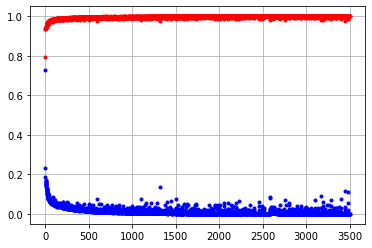

In [69]:
y_accuracy = history.history['accuracy']
y_loss = history.history['loss']
y_val_accuracy = history.history['val_accuracy']
y_val_loss = history.history['val_loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3 )
plt.plot(x_len, y_loss, 'o', c='blue', markersize=3 )
plt.grid()

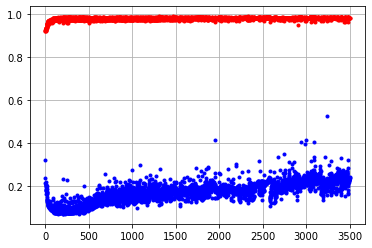

In [70]:
plt.plot(x_len, y_val_accuracy, 'o', c='red', markersize=3 )
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3 )
plt.grid()

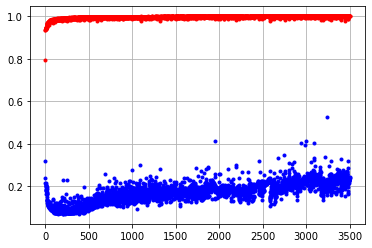

In [71]:
plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3 )
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3 )
plt.grid()

In [73]:
stopping = EarlyStopping(monitor='val_loss', patience=300)

In [ ]:
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=20, verbose=1, callbacks=[stopping])

In [78]:
df= pd.read_csv('data/wine.csv', header=None)
df = df.sample(frac=0.3)

dataset = df.values
X = dataset[:, :12]
Y = dataset[:,12]


stopping = EarlyStopping(monitor='val_loss', patience=300)
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True) # 더 나은 val_loss 값만 저장

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=20, verbose=1, callbacks=[stopping, checkpoint])


Epoch 1/3500
78/78 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8762 - val_loss: 0.2099 - val_accuracy: 0.9385
Epoch 2/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9224 - val_loss: 0.2262 - val_accuracy: 0.9154
Epoch 3/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9262 - val_loss: 0.1780 - val_accuracy: 0.9436
Epoch 4/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.2068 - accuracy: 0.9250 - val_loss: 0.1622 - val_accuracy: 0.9359
Epoch 5/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9205 - val_loss: 0.1468 - val_accuracy: 0.9436
Epoch 6/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.2072 - accuracy: 0.9262 - val_loss: 0.1492 - val_accuracy: 0.9462
Epoch 7/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9333 - val_loss: 0.1730 - val_accuracy: 0.9462
Epoch 

78/78 [==============================] - 0s 997us/step - loss: 0.0561 - accuracy: 0.9801 - val_loss: 0.0315 - val_accuracy: 0.9821
Epoch 116/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 117/3500
78/78 [==============================] - 0s 971us/step - loss: 0.0480 - accuracy: 0.9820 - val_loss: 0.0312 - val_accuracy: 0.9872
Epoch 118/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9795 - val_loss: 0.0341 - val_accuracy: 0.9846
Epoch 119/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0393 - val_accuracy: 0.9821
Epoch 120/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9814 - val_loss: 0.0320 - val_accuracy: 0.9795
Epoch 121/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9808 - val_loss: 0.0495 - val_accuracy: 0.9923
Epo

Epoch 172/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9840 - val_loss: 0.0261 - val_accuracy: 0.9846
Epoch 173/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0272 - val_accuracy: 0.9923
Epoch 174/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9872 - val_loss: 0.0259 - val_accuracy: 0.9872
Epoch 175/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9801 - val_loss: 0.0450 - val_accuracy: 0.9923
Epoch 176/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9840 - val_loss: 0.0255 - val_accuracy: 0.9872
Epoch 177/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9827 - val_loss: 0.0268 - val_accuracy: 0.9872
Epoch 178/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9827 - val_loss: 0.0229 - val_accuracy:

Epoch 229/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9859 - val_loss: 0.0170 - val_accuracy: 0.9897
Epoch 230/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9795 - val_loss: 0.0250 - val_accuracy: 0.9872
Epoch 231/3500
78/78 [==============================] - 0s 971us/step - loss: 0.0436 - accuracy: 0.9846 - val_loss: 0.0204 - val_accuracy: 0.9923
Epoch 232/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9865 - val_loss: 0.0247 - val_accuracy: 0.9897
Epoch 233/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9859 - val_loss: 0.0245 - val_accuracy: 0.9897
Epoch 234/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9846 - val_loss: 0.0321 - val_accuracy: 0.9923
Epoch 235/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9859 - val_loss: 0.0176 - val_accurac

Epoch 286/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9865 - val_loss: 0.0338 - val_accuracy: 0.9923
Epoch 287/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0183 - val_accuracy: 0.9923
Epoch 288/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0319 - accuracy: 0.9872 - val_loss: 0.0288 - val_accuracy: 0.9923
Epoch 289/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9891 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 290/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.0214 - val_accuracy: 0.9923
Epoch 291/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0454 - val_accuracy: 0.9923
Epoch 292/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9872 - val_loss: 0.0168 - val_accurac

Epoch 343/3500
78/78 [==============================] - 0s 958us/step - loss: 0.0304 - accuracy: 0.9872 - val_loss: 0.0268 - val_accuracy: 0.9923
Epoch 344/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0196 - val_accuracy: 0.9923
Epoch 345/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0127 - val_accuracy: 0.9923
Epoch 346/3500
78/78 [==============================] - 0s 967us/step - loss: 0.0182 - accuracy: 0.9904 - val_loss: 0.0150 - val_accuracy: 0.9923
Epoch 347/3500
78/78 [==============================] - 0s 985us/step - loss: 0.0192 - accuracy: 0.9904 - val_loss: 0.0151 - val_accuracy: 0.9923
Epoch 348/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9808 - val_loss: 0.0149 - val_accuracy: 0.9923
Epoch 349/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9840 - val_loss: 0.0218 - val_acc

Epoch 400/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9885 - val_loss: 0.0193 - val_accuracy: 0.9923
Epoch 401/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9904 - val_loss: 0.0176 - val_accuracy: 0.9949
Epoch 402/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9897 - val_loss: 0.0233 - val_accuracy: 0.9897
Epoch 403/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.0134 - val_accuracy: 0.9923
Epoch 404/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0184 - val_accuracy: 0.9949
Epoch 405/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9917 - val_loss: 0.0216 - val_accuracy: 0.9923
Epoch 406/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 0.0090 - val_accuracy:

Epoch 457/3500
78/78 [==============================] - 0s 968us/step - loss: 0.0244 - accuracy: 0.9891 - val_loss: 0.0185 - val_accuracy: 0.9923
Epoch 458/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9917 - val_loss: 0.0119 - val_accuracy: 0.9949
Epoch 459/3500
78/78 [==============================] - 0s 996us/step - loss: 0.0192 - accuracy: 0.9904 - val_loss: 0.0138 - val_accuracy: 0.9923
Epoch 460/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9885 - val_loss: 0.0091 - val_accuracy: 0.9949
Epoch 461/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9910 - val_loss: 0.0176 - val_accuracy: 0.9949
Epoch 462/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9885 - val_loss: 0.0282 - val_accuracy: 0.9923
Epoch 463/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9929 - val_loss: 0.0090 - val_accur

Epoch 514/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9955 - val_loss: 0.0262 - val_accuracy: 0.9923
Epoch 515/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.0243 - val_accuracy: 0.9923
Epoch 516/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0245 - val_accuracy: 0.9923
Epoch 517/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0187 - val_accuracy: 0.9923
Epoch 518/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0174 - val_accuracy: 0.9949
Epoch 519/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0139 - val_accuracy: 0.9949
Epoch 520/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9942 - val_loss: 0.0127 - val_accuracy:

Epoch 571/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.0157 - val_accuracy: 0.9974
Epoch 572/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.0374 - val_accuracy: 0.9923
Epoch 573/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0133 - val_accuracy: 0.9949
Epoch 574/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0195 - val_accuracy: 0.9923
Epoch 575/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0211 - val_accuracy: 0.9923
Epoch 576/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9923 - val_loss: 0.0189 - val_accuracy: 0.9923
Epoch 577/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9955 - val_loss: 0.0216 - val_accuracy:

Epoch 628/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9968 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 629/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0615 - val_accuracy: 0.9846
Epoch 630/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9955 - val_loss: 0.0318 - val_accuracy: 0.9923
Epoch 631/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9974 - val_loss: 0.0625 - val_accuracy: 0.9872
Epoch 632/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0089 - val_accuracy: 0.9949
Epoch 633/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9949 - val_loss: 0.0357 - val_accuracy: 0.9923
Epoch 634/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.9936 - val_loss: 0.0385 - val_accuracy:

Epoch 685/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9936 - val_loss: 0.0202 - val_accuracy: 0.9923
Epoch 686/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9962 - val_loss: 0.0550 - val_accuracy: 0.9897
Epoch 687/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9929 - val_loss: 0.0572 - val_accuracy: 0.9897
Epoch 688/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0487 - val_accuracy: 0.9897
Epoch 689/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.0670 - val_accuracy: 0.9897
Epoch 690/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.0666 - val_accuracy: 0.9897
Epoch 691/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0302 - val_accuracy:

Epoch 742/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9962 - val_loss: 0.0386 - val_accuracy: 0.9923
Epoch 743/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0858 - accuracy: 0.9795 - val_loss: 0.0350 - val_accuracy: 0.9923
Epoch 744/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0343 - val_accuracy: 0.9923
Epoch 745/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9923
Epoch 746/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0187 - val_accuracy: 0.9949
Epoch 747/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9968 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 748/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 0.0494 - val_accurac

Epoch 799/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9968 - val_loss: 0.0663 - val_accuracy: 0.9923
Epoch 800/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9955 - val_loss: 0.0278 - val_accuracy: 0.9923
Epoch 801/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0555 - val_accuracy: 0.9923
Epoch 802/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0324 - val_accuracy: 0.9923
Epoch 803/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0462 - val_accuracy: 0.9897
Epoch 804/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9981 - val_loss: 0.0389 - val_accuracy: 0.9923
Epoch 805/3500
78/78 [==============================] - 0s 997us/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0296 - val_accurac

Epoch 856/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 0.9923
Epoch 857/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.9923
Epoch 858/3500
78/78 [==============================] - 0s 991us/step - loss: 9.1533e-04 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9897
Epoch 859/3500
78/78 [==============================] - 0s 958us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9923
Epoch 860/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0876 - val_accuracy: 0.9872
Epoch 861/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.1164 - val_accuracy: 0.9897
Epoch 862/3500
78/78 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9897 - val_loss: 0.0288 - val_a

In [75]:
'''
modelcheckpoint 객체와 earlystopping 객체를 함께 적용하여 학습을 수행한 후, 그 결과를 그래프로 보이고 베스트 모델을 이용하여
테스트셋의 검증 정확도를 출력하는 코드를 작성하세요
'''

In [6]:
df= pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=1)

dataset = df.values
X = dataset[:, :12]
Y = dataset[:,12]

seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

stopping = EarlyStopping(monitor='val_loss', patience=300)
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 더 나은 val_loss 값만 저장

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.3, epochs=3500, batch_size=50, callbacks=[stopping, checkpoint])


Epoch 1/3500
64/64 [==============================] - 2s 12ms/step - loss: 0.7152 - accuracy: 0.7546 - val_loss: 0.3497 - val_accuracy: 0.7890

Epoch 00001: val_loss improved from inf to 0.34969, saving model to ./model\01-0.3497.hdf5
Epoch 2/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.8693 - val_loss: 0.2974 - val_accuracy: 0.9062

Epoch 00002: val_loss improved from 0.34969 to 0.29741, saving model to ./model\02-0.2974.hdf5
Epoch 3/3500
64/64 [==============================] - 0s 7ms/step - loss: 0.2812 - accuracy: 0.9195 - val_loss: 0.2767 - val_accuracy: 0.9209

Epoch 00003: val_loss improved from 0.29741 to 0.27671, saving model to ./model\03-0.2767.hdf5
Epoch 4/3500
64/64 [==============================] - 1s 8ms/step - loss: 0.2562 - accuracy: 0.9293 - val_loss: 0.2600 - val_accuracy: 0.9267

Epoch 00004: val_loss improved from 0.27671 to 0.26002, saving model to ./model\04-0.2600.hdf5
Epoch 5/3500
64/64 [==============================]

64/64 [==============================] - 0s 4ms/step - loss: 0.0879 - accuracy: 0.9749 - val_loss: 0.1110 - val_accuracy: 0.9707

Epoch 00037: val_loss did not improve from 0.08915
Epoch 38/3500
64/64 [==============================] - 1s 8ms/step - loss: 0.0909 - accuracy: 0.9705 - val_loss: 0.0883 - val_accuracy: 0.9685

Epoch 00038: val_loss improved from 0.08915 to 0.08830, saving model to ./model\38-0.0883.hdf5
Epoch 39/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0918 - accuracy: 0.9714 - val_loss: 0.1145 - val_accuracy: 0.9590

Epoch 00039: val_loss did not improve from 0.08830
Epoch 40/3500
64/64 [==============================] - 1s 8ms/step - loss: 0.0818 - accuracy: 0.9761 - val_loss: 0.0887 - val_accuracy: 0.9670

Epoch 00040: val_loss did not improve from 0.08830
Epoch 41/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0799 - accuracy: 0.9758 - val_loss: 0.0859 - val_accuracy: 0.9736

Epoch 00041: val_loss improved from 0.08830 to

64/64 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9783 - val_loss: 0.0674 - val_accuracy: 0.9773

Epoch 00077: val_loss improved from 0.06820 to 0.06737, saving model to ./model\77-0.0674.hdf5
Epoch 78/3500
64/64 [==============================] - 0s 7ms/step - loss: 0.0621 - accuracy: 0.9815 - val_loss: 0.0735 - val_accuracy: 0.9744

Epoch 00078: val_loss did not improve from 0.06737
Epoch 79/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.0733 - val_accuracy: 0.9817

Epoch 00079: val_loss did not improve from 0.06737
Epoch 80/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0644 - accuracy: 0.9827 - val_loss: 0.0791 - val_accuracy: 0.9736

Epoch 00080: val_loss did not improve from 0.06737
Epoch 81/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0606 - accuracy: 0.9830 - val_loss: 0.1061 - val_accuracy: 0.9634

Epoch 00081: val_loss did not improve from 0.0

64/64 [==============================] - 0s 7ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0684 - val_accuracy: 0.9773

Epoch 00118: val_loss did not improve from 0.06286
Epoch 119/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0655 - val_accuracy: 0.9810

Epoch 00119: val_loss did not improve from 0.06286
Epoch 120/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9855 - val_loss: 0.0740 - val_accuracy: 0.9773

Epoch 00120: val_loss did not improve from 0.06286
Epoch 121/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.0664 - val_accuracy: 0.9817

Epoch 00121: val_loss did not improve from 0.06286
Epoch 122/3500
64/64 [==============================] - 0s 7ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0708 - val_accuracy: 0.9802

Epoch 00122: val_loss did not improve from 0.06286
Epoch 123/3500
64/64 [=============

64/64 [==============================] - 0s 6ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0724 - val_accuracy: 0.9780

Epoch 00160: val_loss did not improve from 0.06286
Epoch 161/3500
64/64 [==============================] - 0s 7ms/step - loss: 0.0556 - accuracy: 0.9840 - val_loss: 0.0788 - val_accuracy: 0.9773

Epoch 00161: val_loss did not improve from 0.06286
Epoch 162/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0602 - accuracy: 0.9837 - val_loss: 0.0788 - val_accuracy: 0.9758

Epoch 00162: val_loss did not improve from 0.06286
Epoch 163/3500
64/64 [==============================] - 0s 7ms/step - loss: 0.0536 - accuracy: 0.9843 - val_loss: 0.0657 - val_accuracy: 0.9780

Epoch 00163: val_loss did not improve from 0.06286
Epoch 164/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0626 - val_accuracy: 0.9824

Epoch 00164: val_loss improved from 0.06286 to 0.06259, saving model to ./model\164-0.

64/64 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9865 - val_loss: 0.0719 - val_accuracy: 0.9773

Epoch 00201: val_loss did not improve from 0.06076
Epoch 202/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9859 - val_loss: 0.0633 - val_accuracy: 0.9810

Epoch 00202: val_loss did not improve from 0.06076
Epoch 203/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.0640 - val_accuracy: 0.9824

Epoch 00203: val_loss did not improve from 0.06076
Epoch 204/3500
64/64 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.98 - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9855 - val_loss: 0.0622 - val_accuracy: 0.9824

Epoch 00204: val_loss did not improve from 0.06076
Epoch 205/3500
64/64 [==============================] - 0s 7ms/step - loss: 0.0478 - accuracy: 0.9865 - val_loss: 0.0712 - val_accuracy: 0.9802

Epoch 00205: val_loss did not improve from 0

64/64 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9877 - val_loss: 0.0670 - val_accuracy: 0.9788

Epoch 00242: val_loss did not improve from 0.05877
Epoch 243/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0611 - val_accuracy: 0.9839

Epoch 00243: val_loss did not improve from 0.05877
Epoch 244/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9871 - val_loss: 0.0651 - val_accuracy: 0.9817

Epoch 00244: val_loss did not improve from 0.05877
Epoch 245/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.0624 - val_accuracy: 0.9846

Epoch 00245: val_loss did not improve from 0.05877
Epoch 246/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0446 - accuracy: 0.9893 - val_loss: 0.0598 - val_accuracy: 0.9824

Epoch 00246: val_loss did not improve from 0.05877
Epoch 247/3500
64/64 [=============


Epoch 00283: val_loss did not improve from 0.05836
Epoch 284/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9890 - val_loss: 0.0663 - val_accuracy: 0.9802

Epoch 00284: val_loss did not improve from 0.05836
Epoch 285/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9859 - val_loss: 0.0655 - val_accuracy: 0.9780

Epoch 00285: val_loss did not improve from 0.05836
Epoch 286/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9884 - val_loss: 0.0869 - val_accuracy: 0.9758

Epoch 00286: val_loss did not improve from 0.05836
Epoch 287/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9877 - val_loss: 0.0627 - val_accuracy: 0.9839

Epoch 00287: val_loss did not improve from 0.05836
Epoch 288/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9884 - val_loss: 0.0588 - val_accuracy: 0.9839

Epoch 00288: val_lo

64/64 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9896 - val_loss: 0.0699 - val_accuracy: 0.9795

Epoch 00325: val_loss did not improve from 0.05836
Epoch 326/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9896 - val_loss: 0.0598 - val_accuracy: 0.9839

Epoch 00326: val_loss did not improve from 0.05836
Epoch 327/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9890 - val_loss: 0.0705 - val_accuracy: 0.9802

Epoch 00327: val_loss did not improve from 0.05836
Epoch 328/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.0633 - val_accuracy: 0.9861

Epoch 00328: val_loss did not improve from 0.05836
Epoch 329/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9896 - val_loss: 0.0648 - val_accuracy: 0.9846

Epoch 00329: val_loss did not improve from 0.05836
Epoch 330/3500
64/64 [=============


Epoch 00366: val_loss did not improve from 0.05836
Epoch 367/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9921 - val_loss: 0.0612 - val_accuracy: 0.9861

Epoch 00367: val_loss did not improve from 0.05836
Epoch 368/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9918 - val_loss: 0.0701 - val_accuracy: 0.9810

Epoch 00368: val_loss did not improve from 0.05836
Epoch 369/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0398 - accuracy: 0.9893 - val_loss: 0.0688 - val_accuracy: 0.9810

Epoch 00369: val_loss did not improve from 0.05836
Epoch 370/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0654 - val_accuracy: 0.9853

Epoch 00370: val_loss did not improve from 0.05836
Epoch 371/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9893 - val_loss: 0.0687 - val_accuracy: 0.9802

Epoch 00371: val_lo


Epoch 00408: val_loss did not improve from 0.05836
Epoch 409/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.9903 - val_loss: 0.0655 - val_accuracy: 0.9883

Epoch 00409: val_loss did not improve from 0.05836
Epoch 410/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.9918 - val_loss: 0.0714 - val_accuracy: 0.9846

Epoch 00410: val_loss did not improve from 0.05836
Epoch 411/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9840 - val_loss: 0.0819 - val_accuracy: 0.9810

Epoch 00411: val_loss did not improve from 0.05836
Epoch 412/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9909 - val_loss: 0.0642 - val_accuracy: 0.9861

Epoch 00412: val_loss did not improve from 0.05836
Epoch 413/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9912 - val_loss: 0.0708 - val_accuracy: 0.9802

Epoch 00413: val_lo


Epoch 00450: val_loss did not improve from 0.05836
Epoch 451/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9928 - val_loss: 0.0619 - val_accuracy: 0.9861

Epoch 00451: val_loss did not improve from 0.05836
Epoch 452/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9931 - val_loss: 0.0633 - val_accuracy: 0.9861

Epoch 00452: val_loss did not improve from 0.05836
Epoch 453/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9931 - val_loss: 0.0645 - val_accuracy: 0.9853

Epoch 00453: val_loss did not improve from 0.05836
Epoch 454/3500
64/64 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0971 - val_accuracy: 0.9707

Epoch 00454: val_loss did not improve from 0.05836
Epoch 455/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.9925 - val_loss: 0.0644 - val_accuracy: 0.9846

Epoch 00455: val_lo

64/64 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.9925 - val_loss: 0.0690 - val_accuracy: 0.9853

Epoch 00492: val_loss did not improve from 0.05836
Epoch 493/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9937 - val_loss: 0.0858 - val_accuracy: 0.9795

Epoch 00493: val_loss did not improve from 0.05836
Epoch 494/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0667 - val_accuracy: 0.9861

Epoch 00494: val_loss did not improve from 0.05836
Epoch 495/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0693 - val_accuracy: 0.9832

Epoch 00495: val_loss did not improve from 0.05836
Epoch 496/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.9915 - val_loss: 0.0652 - val_accuracy: 0.9853

Epoch 00496: val_loss did not improve from 0.05836
Epoch 497/3500
64/64 [=============

64/64 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9934 - val_loss: 0.0858 - val_accuracy: 0.9802

Epoch 00534: val_loss did not improve from 0.05836
Epoch 535/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.0748 - val_accuracy: 0.9832

Epoch 00535: val_loss did not improve from 0.05836
Epoch 536/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9928 - val_loss: 0.0718 - val_accuracy: 0.9846

Epoch 00536: val_loss did not improve from 0.05836
Epoch 537/3500
64/64 [==============================] - 0s 6ms/step - loss: 0.0278 - accuracy: 0.9928 - val_loss: 0.0696 - val_accuracy: 0.9853

Epoch 00537: val_loss did not improve from 0.05836
Epoch 538/3500
64/64 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.9931 - val_loss: 0.0759 - val_accuracy: 0.9839

Epoch 00538: val_loss did not improve from 0.05836
Epoch 539/3500
64/64 [=============

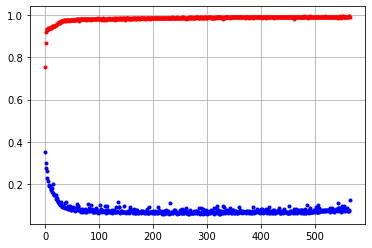

In [7]:
y_accuracy = history.history['accuracy']
y_val_loss = history.history['val_loss']
x_len = np.arange(len(y_accuracy))
plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3 )
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3 )
plt.grid()

plt.show()

In [10]:
best_model = load_model('./model/266-0.0584.hdf5')
result = best_model.evaluate(X_test,Y_test, verbose=0)
print('test loss: {:.4f}, test_accuracy: {:.4f}'.format(result[0], result[1]))

test loss: 0.0380, test_accuracy: 0.9877
